In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rand
from scipy import stats


import math
from matplotlib import colors
from matplotlib import patches

# Objective 1: Model random walkers trajectories that move in response to chemoattractants

In [52]:
# Initialize parameters of ABP model and locations first

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =5.0; dt = 1; Drot = 0.1; Dtrans = 0.1;
# vel =10.0; dt = 1; Drot = 0.1; Dtrans = 0.1; #These work pretty well, will see if other work better

# initialize arrays that store x,y and theta values, 
#as well as initial particle position and angle
num_steps = 500;
num_walks = 10;
x_scaling = 3000;
 
nutrient_center = [1500, 1500] # point where nutrient is located
nutrient_exponent, start_exponent = 6, 2 # Initial concentration and 10^3 uM
proximity = 0 # distance from start to center, will be calculated later

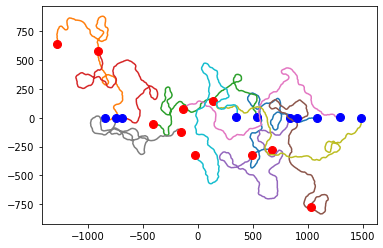

In [59]:
# Define completely random walkers where steps are taken using ABP

def ABP_step_rand():
    for j  in range(num_walks):
        
        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
        x=x_scaling*(rand()-0.5); y = 0.0; theta = (2*np.pi)*rand();
        
        # inner for loop is each step for a given walker/trajectory
        for i in range(num_steps):
                # calculate diffusive/random steps. For the x- and y-,we generate 
                #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).

                #dx = np.sqrt(2*Dtrans*dt)*2*; 
                dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 

                dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 

                #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
                dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);

                # update coordinates (including ballistic step)
                x += vel*dt*np.cos(theta) + dx;
                y += vel*dt*np.sin(theta) + dy;


                # store successive positions in arrays
                xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                # update the angle and store in array
                theta += dtheta;
                thetavec = np.append(thetavec, theta);
        plt.plot(xvec,yvec, '-');
        plt.plot(xvec[-1],yvec[-1],'ro', markersize = 8)
        plt.plot(xvec[0],yvec[0],'bo', markersize = 8)
    
ABP_step_rand()

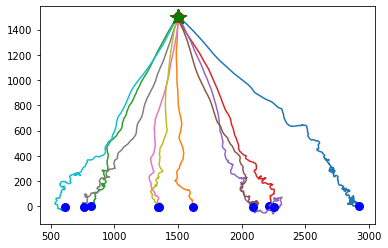

In [60]:
# Define biased random walker with chemoattractant where steps are taken using ABP


# Calculates the distance from the random walkers current position (a) to the focal point of the nutrient (b)
def distance_to_nutrient(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


# Calculates concentration at current position
def calculate_conc(pos):
    dist = distance_to_nutrient(pos, nutrient_center) #
    initial_proximity = distance_to_nutrient([0,0],nutrient_center); #initialize proximity to nutrient at start
    exponent = (1 - dist / initial_proximity) * (nutrient_exponent - start_exponent) + start_exponent
    return 10 ** exponent


# Calculates contribution of contribution gradient on movement
def gradient_force(x,y,xnutr,ynutr):
    proximity = distance_to_nutrient([x,y],nutrient_center)
    
    concentration = calculate_conc([x,y])

    x_force = (xnutr - x)*concentration*10**-6; # as concentration increases, make walker move towards 
    y_force = (ynutr - y)*concentration*10**-6; # as concentration increases, make walker move towards 
    
    x_combined = x+x_force;
    y_combined = y+y_force;
    return x_combined, y_combined, x_force, y_force, proximity, concentration


def ABP_step_biased():

    for j  in range(num_walks):
        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
        x=x_scaling*(rand()); y = 0.0; theta = (2*np.pi)*rand();
        
        proximity = distance_to_nutrient([x,y],nutrient_center); #initialize proximity to nutrient at start
#         print('Initial proximity =',proximity)
        concentration = calculate_conc([x,y])
#         print('Initial concentration =',concentration,'\n')
        
        # inner for loop is each step for a given walker/trajectory        
        for i in range(num_steps):
                # calculate diffusive/random steps. For the x- and y-,we generate 
                #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
                
                # calculate change in position
                dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
                #dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);

                # update coordinates (including ballistic step)
                x += vel*dt*np.cos(theta) + dx;
                y += vel*dt*np.sin(theta) + dy;

                # store successive positions in arrays
                xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                # update the angle and store in array
                theta += dtheta;
                thetavec = np.append(thetavec, theta);
                
                                        
            
                pos_comb = gradient_force(x,y,nutrient_center[0],nutrient_center[1])
                
#                 print('x=',x,'y=',y)
#                 print('x_force = ', pos_comb[2],'y_force = ', pos_comb[3])
#                 print('x_combined = ', pos_comb[0],'y_combined = ', pos_comb[1])
# #                 print('Change in x and y positions =', pos_comb[0:1],'\n')
#                 print('proximity_vec = ',  pos_comb[4])
#                 print('concentration_vec = ',  pos_comb[5],'\n')
    
                # store successive positions in arrays
                x = pos_comb[0];
                y = pos_comb[1];
                                
        plt.plot(xvec,yvec, '-');
        plt.plot(xvec[-1],yvec[-1],'ro', markersize = 8)
        plt.plot(nutrient_center[0],nutrient_center[1],'g*', markersize = 16)
        plt.plot(xvec[0],yvec[0],'bo', markersize = 8)

ABP_step_biased()

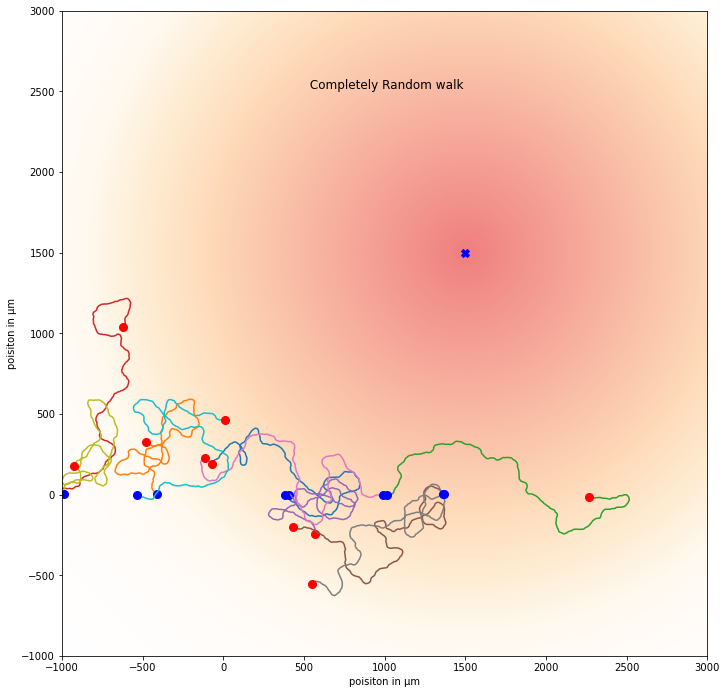

In [55]:
# Make plot of chemoattractant gradient with random walk
plot_lim_x = [-1000,3000];
plot_lim_y = [-1000,3000];


#Below are all for plotting purposes
methods = ["Pure random walk", "Nutrient attractant walk"]
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

#First set color map
mycolor = [[256, 256, 256], [256, 255, 254], [256, 253, 250], [256, 250, 240], [255, 236, 209], [255, 218, 185], [251, 196, 171], [248, 173, 157], [244, 151, 142], [240, 128, 128]] #from coolors：）
for i in mycolor:
    for j in range(len(i)):
        i[j] *= (1/256)
cmap_color = colors.LinearSegmentedColormap.from_list('my_list', mycolor) #Linearly segment these colors to create a continuous color map

#Store the concentrations for each integer position in a matrix
m = 4000
conc_matrix = np.zeros((m, m)) #we will display from [-1000, -1000] to [3000, 3000]
for i in range(m):
    for j in range(m):
        conc_matrix[i][j] = math.log(calculate_conc([i - 1000, j - 1000]))


#Simulate the gradient distribution, plot as a heatmap
ax.imshow(conc_matrix.T, cmap=cmap_color, interpolation='nearest', extent = [plot_lim_x[0], plot_lim_x[1], plot_lim_y[0], plot_lim_y[1]], origin = 'lower')

ax.plot(nutrient_center[0], nutrient_center[1], 'bX', markersize = 8) #Mark the highest concentration point [1500, 1500]
ax.set_title(" Completely Random walk".format(), x = 0.5, y = 0.87)
ax.set_xlim(plot_lim_x[0], plot_lim_x[1])
ax.set_ylim(plot_lim_y[0], plot_lim_y[1])
ax.set_xlabel("poisiton in μm")
ax.set_ylabel("poisiton in μm")

ABP_step_rand()
fig.tight_layout()
plt.show()

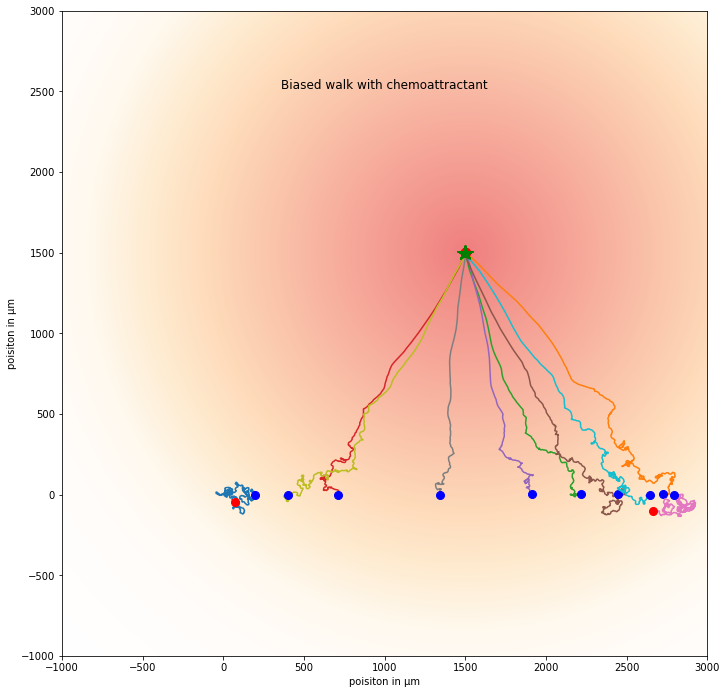

In [61]:
# Make plot of chemoattractant gradient with biased random walk 
plot_lim_x = [-1000,3000];
plot_lim_y = [-1000,3000];


#Below are all for plotting purposes
methods = ["Pure random walk", "Nutrient attractant walk"]
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

#First set color map
mycolor = [[256, 256, 256], [256, 255, 254], [256, 253, 250], [256, 250, 240], [255, 236, 209], [255, 218, 185], [251, 196, 171], [248, 173, 157], [244, 151, 142], [240, 128, 128]] #from coolors：）
for i in mycolor:
    for j in range(len(i)):
        i[j] *= (1/256)
cmap_color = colors.LinearSegmentedColormap.from_list('my_list', mycolor) #Linearly segment these colors to create a continuous color map

#Store the concentrations for each integer position in a matrix
m = 4000
conc_matrix = np.zeros((m, m)) #we will display from [-1000, -1000] to [3000, 3000]
for i in range(m):
    for j in range(m):
        conc_matrix[i][j] = math.log(calculate_conc([i - 1000, j - 1000]))


#Simulate the gradient distribution, plot as a heatmap
ax.imshow(conc_matrix.T, cmap=cmap_color, interpolation='nearest', extent = [plot_lim_x[0], plot_lim_x[1], plot_lim_y[0], plot_lim_y[1]], origin = 'lower')

ax.plot(nutrient_center[0], nutrient_center[1], 'bX', markersize = 8) #Mark the highest concentration point [1500, 1500]
ax.set_title("Biased walk with chemoattractant".format(), x = 0.5, y = 0.87)
ax.set_xlim(plot_lim_x[0], plot_lim_x[1])
ax.set_ylim(plot_lim_y[0], plot_lim_y[1])
ax.set_xlabel("poisiton in μm")
ax.set_ylabel("poisiton in μm")

ABP_step_biased()
fig.tight_layout()
plt.show()